# Build Visualizations for Rating Evaluation


In [133]:
# Get role and person to compare
person_id = 6

role_rank = 1

## Import Libraries

In [134]:
import pandas as pd
import numpy as np

## Get Role Data

In [135]:
# Get the role from the collected data from the survey
people = pd.read_csv(filepath_or_buffer="../2-data/survey_people.csv", sep=",", encoding="latin1")
df_people = people[people['id']==person_id]

# Tokenize the skills
df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("'", ""))
df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("[", ""))
df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("]", ""))

df_people['skills'] = df_people['skills'].apply(lambda x: x.split(';'))
#df_people['skills'] = df_people['skills'].apply(set)

df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.replace("'", ""))
df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.replace("[", ""))
df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.replace("]", ""))
df_people['skills-want'] = df_people['skills-want'].apply(lambda x: x.split(';'))
#df_people['skills-want'] = df_people['skills-want'].apply(set)

df_people = df_people[['id', 'skills', 'skills-want']]

df_people


<ipython-input-135-1ab699547257>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("'", ""))
<ipython-input-135-1ab699547257>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_people['skills'] = df_people['skills'].apply(lambda x: x.replace("[", ""))
<ipython-input-135-1ab699547257>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,id,skills,skills-want
5,6,"[MATLAB, Python, R, SQL, Swift, Cassandra, Cou...","[Python, Microsoft SQL Server, MongoDB, Neo4j,..."


In [136]:
df_person_skills = df_people.explode('skills')[['id', 'skills']]
df_person_skills['skills'] = df_person_skills['skills'].str.strip()
df_person_skills#['source'] = 'person-skills'


,id,skills
5,6,MATLAB
5,6,Python
5,6,R
5,6,SQL
5,6,Swift
5,6,Cassandra
5,6,CouchDB
5,6,MariaDB
5,6,Microsoft SQL Server
5,6,MySQL


In [137]:

df_person_interests = df_people.explode('skills-want')[['id', 'skills-want']]
df_person_interests['skills'] = df_person_interests['skills-want']
#df_person_interests['source'] = 'person-interests'
#df_person_interests = df_person_interests[['id', 'skills', 'source']]
df_person_interests = df_person_interests[['id', 'skills']]
df_person_interests['skills'] = df_person_interests['skills'].str.strip()
df_person_interests

,id,skills
5,6,Python
5,6,Microsoft SQL Server
5,6,MongoDB
5,6,Neo4j
5,6,AWS
5,6,Google Cloud
5,6,Microsoft Azure
5,6,Keras
5,6,NumPy
5,6,Pandas


# Get Employees Data

In [138]:


# Read the employees dataset - from the data entered in the survey
df_roles = pd.read_csv(filepath_or_buffer=f"../6-results/rating_ITProfessional_{person_id}.csv", sep=",", encoding="latin1")
df_roles

#df_roles = df_roles[(df_roles['rank-model1']==1) | (df_roles['rank-model2']==1) | (df_roles['rank-model3']==1)]
df_roles = df_roles[(df_roles['rank-model1']==role_rank) | (df_roles['rank-model2']==role_rank) | (df_roles['rank-model3']==role_rank)]


# Tokenize the skills
df_roles['skills'] = df_roles['skills'].apply(lambda x: x.replace("'", ""))
df_roles['skills'] = df_roles['skills'].apply(lambda x: x.replace("[", ""))
df_roles['skills'] = df_roles['skills'].apply(lambda x: x.replace("]", ""))

df_roles['skills'] = df_roles['skills'].apply(lambda x: x.split(','))
#df_people['skills'] = df_people['skills'].apply(set)


role_id_1 = df_roles['id'][(df_roles['rank-model1']==role_rank)].values[0]
role_id_2 = df_roles['id'][(df_roles['rank-model2']==role_rank)].values[0]
role_id_3 = df_roles['id'][(df_roles['rank-model3']==role_rank)].values[0]


df_roles = df_roles[['id', 'skills']]



df_roles

,id,skills
0,31,"[Clojure, Go, Java, Python, Microsoft SQL ..."
3,35,"[C, C++, Go, Java, JavaScript, Kotlin, S..."


In [139]:
# Tokenize the skills
#df_roles['skills'] = df_roles['skills'].apply(lambda x: x.split(';'))

df_role_skills = df_roles.explode('skills')[['id', 'skills']]
df_role_skills['skills'] = df_role_skills['skills'].str.strip()
#df_role_skills['source'] = 'role-skills'
df_role_skills

,id,skills
0,31,Clojure
0,31,Go
0,31,Java
0,31,Python
0,31,Microsoft SQL Server
0,31,MongoDB
0,31,PostgreSQL
0,31,AWS
0,31,Google Cloud
0,31,Microsoft Azure


In [140]:
df_person_skills = df_people.explode('skills')[['id', 'skills']]
df_person_skills['skills'] = df_person_skills['skills'].str.strip()
df_person_skills#['source'] = 'person-skills'


,id,skills
5,6,MATLAB
5,6,Python
5,6,R
5,6,SQL
5,6,Swift
5,6,Cassandra
5,6,CouchDB
5,6,MariaDB
5,6,Microsoft SQL Server
5,6,MySQL


In [141]:
df_person_interests = df_people.explode('skills-want')[['id', 'skills-want']]
df_person_interests['skills'] = df_person_interests['skills-want']
#df_person_interests['source'] = 'person-interests'
#df_person_interests = df_person_interests[['id', 'skills', 'source']]
df_person_interests = df_person_interests[['id', 'skills']]
df_person_interests['skills'] = df_person_interests['skills'].str.strip()
df_person_interests


,id,skills
5,6,Python
5,6,Microsoft SQL Server
5,6,MongoDB
5,6,Neo4j
5,6,AWS
5,6,Google Cloud
5,6,Microsoft Azure
5,6,Keras
5,6,NumPy
5,6,Pandas


# Compute Number for each combination

In [142]:
from sqlalchemy import create_engine

def create_table(name, df):
    # Create a connection to the database
    engine = create_engine('sqlite:///database.db')

    # Load the DataFrame into a table
    df.to_sql(f'{name}', engine, if_exists='replace', index=False)

    # Close the database connection
    engine.dispose()

create_table('person_skills', df_person_skills)
create_table('person_interests', df_person_interests)
create_table('role_skills', df_role_skills)


In [143]:
def query_database(sql):
    # Create a connection to the database
    engine = create_engine('sqlite:///database.db')

    # Query the data
    query = sql
    result = engine.execute(query)

    # Fetch all the rows from the result object
    rows = result.fetchall()

    # Convert the rows to a DataFrame
    df_result = pd.DataFrame(rows, columns=result.keys())

    # Close the database connection
    engine.dispose()

    return df_result


In [144]:
# Get total number of skills in the role
result = query_database("""
    select skills from role_skills
""")
result
all_skills = result.count()[0]
all_skills

60

In [145]:
def compute_matched_skills_only(role):
    # Get skills only
    result = query_database(f"""
        select ps.skills from role_skills rs, person_skills ps 
        where ps.skills = rs.skills and rs.id = {role} and ps.skills not in (
            select skills from person_interests);
        """)
    result
    matched_skills_only = result.count()[0]
    return matched_skills_only

print(compute_matched_skills_only(29474))

def compute_matched_skills_and_interests(role):
    
    # Get skills and interests
    result = query_database(f"""
        select rs.skills from role_skills rs, person_skills ps where rs.skills = ps.skills and rs.id = {role} and rs.skills in (select skills from person_interests);
        """)
    result
    matched_skills_and_interests = result.count()[0]
    return matched_skills_and_interests


def compute_matched_interests_only(role):
    # Get interests only
    result = query_database(f"""
        select rs.skills from role_skills rs, person_interests pi where rs.skills = pi.skills and rs.id = {role}  and rs.skills not in (select skills from person_skills);
        """)
    result
    matched_interests_only = result.count()[0]
    return matched_interests_only



def compute_skills_not_matched(role):
    # Get skills not matched on neither skills nor interests
    result = query_database(f"""
        select rs.skills from role_skills rs where rs.id = {role} and rs.skills not in (select skills from person_skills) and rs.skills not in (select skills from person_interests) ;
        """)
    result
    skills_not_matched = result.count()[0]
    return skills_not_matched




0


In [146]:

print(compute_matched_skills_only(11))
print(compute_matched_skills_and_interests(11))
print(compute_matched_interests_only(13))
print(compute_skills_not_matched(13))

0
0
0
0


# See Results

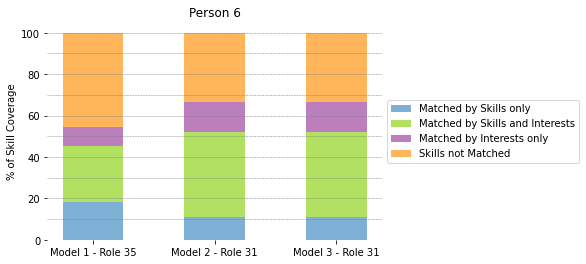

In [147]:
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'Category': [f'Model 1 - Role {role_id_1}', f'Model 2 - Role {role_id_2}', f'Model 3 - Role {role_id_3}'],
    'Matched by Skills only': [compute_matched_skills_only(role_id_1), compute_matched_skills_only(role_id_2), compute_matched_skills_only(role_id_3)],
    'Matched by Skills and Interests': [compute_matched_skills_and_interests(role_id_1), compute_matched_skills_and_interests(role_id_2), compute_matched_skills_and_interests(role_id_3)],
    'Matched by Interests only': [compute_matched_interests_only(role_id_1), compute_matched_interests_only(role_id_2), compute_matched_interests_only(role_id_3)],
    'Skills not Matched': [compute_skills_not_matched(role_id_1), compute_skills_not_matched(role_id_2), compute_skills_not_matched(role_id_3)]
}
df = pd.DataFrame(data)

# Calculate the percentage for each value in each category
total = df[['Matched by Skills only', 'Matched by Skills and Interests', 'Matched by Interests only', 'Skills not Matched']].sum(axis=1)
df_percent = df[['Matched by Skills only', 'Matched by Skills and Interests', 'Matched by Interests only', 'Skills not Matched']].div(total, axis=0) * 100

# Plot the 100% stacked bar chart
fig, ax = plt.subplots()
categories = df['Category']
bar_width = 0.5

bottom = [0] * len(categories)
colors =  ['#7eb0d5', '#b2e061', '#bd7ebe', '#ffb55a']

for i, col in enumerate(df_percent.columns):
    values = df_percent[col]
    ax.bar(categories, values, bar_width, bottom=bottom, color=colors[i], label=col)
    bottom += values

ax.set_ylabel('% of Skill Coverage')
ax.set_xlabel(f'')
ax.set_title(f'Person {person_id}')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the left and bottom spines
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

scale_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Specify the values for horizontal lines
for value in scale_values:
    ax.axhline(value, color='gray', linestyle='--', linewidth=0.5)

plt.show()


In [437]:
# Save chart
plt.savefig(f'rating_role_{person_id}.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>